In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
# Load the dataset
df = pd.read_excel('drive/My Drive/Colab Notebooks/Dataset/Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.shape

(5000, 14)

In [5]:
#Check data info and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [9]:
#Drop Unused columns
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

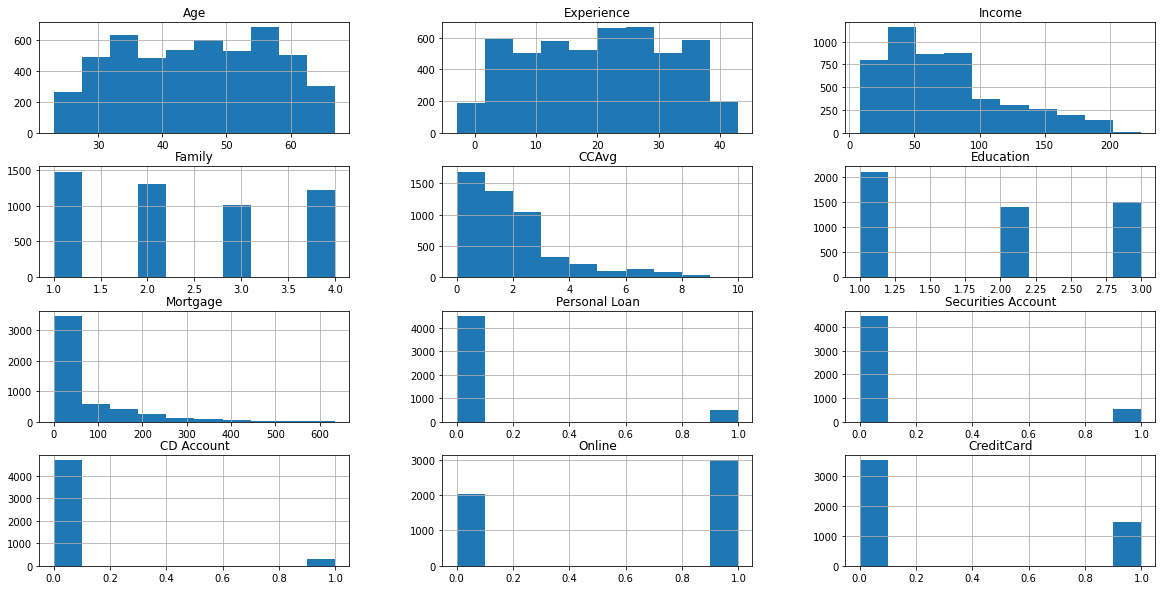

In [10]:
#EDA
plt.rcParams["figure.figsize"] = (20,10)
df.hist();

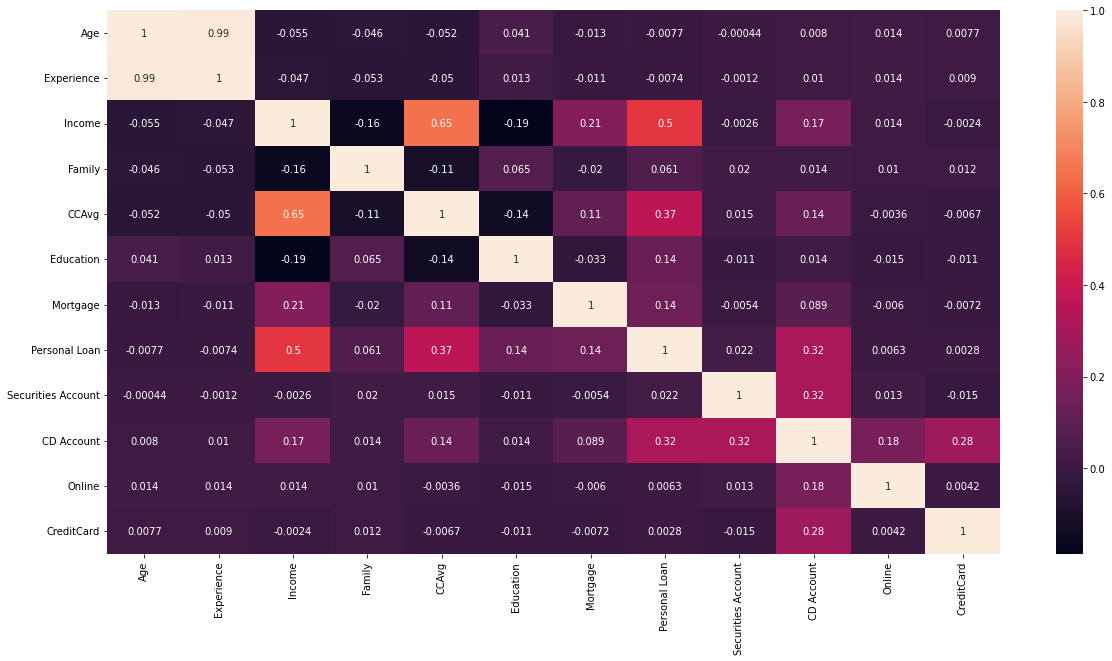

In [11]:
#EDA

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
# Splitting
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

data_train, data_test, target_train, target_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# train model
model = RandomForestClassifier()
model.fit(data_train, target_train)

RandomForestClassifier()

In [13]:
#Evaluation
target_predicted = model.predict(data_test)

model.score(data_test, target_test)

0.99

In [16]:
#Classification report

print(classification_report(target_test, target_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.92      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

